### Ejemplos tomados de un tutorial de sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.rcParams['figure.figsize'] = (20, 10)
pd.set_option('display.max_columns', 500)

In [2]:
import sklearn
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

/home/qsergio/miniconda3/envs/prueba/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence
/home/qsergio/miniconda3/envs/prueba/lib/python3.7/site-packages/sklearn/feature_extraction/dict_vectorizer.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/home/qsergio/miniconda3/envs/prueba/lib/python3.7/site-packages/sklearn/model_selection/_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
df.Parch.describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [6]:
df["Survived"].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [31]:
X = df[["Pclass","Age", "Fare", "Parch"]]
y = df["Survived"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)

In [33]:
X_train = X_train.fillna(3)
X_test = X_test.fillna(30)

In [34]:
multi_log = linear_model.LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, max_iter=150,
                   multi_class='ovr', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
multi_log.fit(X_train, y_train)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=150, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
y_pred = multi_log.predict(X_test)

In [37]:
y_pred_p = multi_log.predict_proba(X_test)

In [38]:
print("Y el accuracy es:",
metrics.accuracy_score(y_test, y_pred)*100)

Y el accuracy es: 70.58823529411765


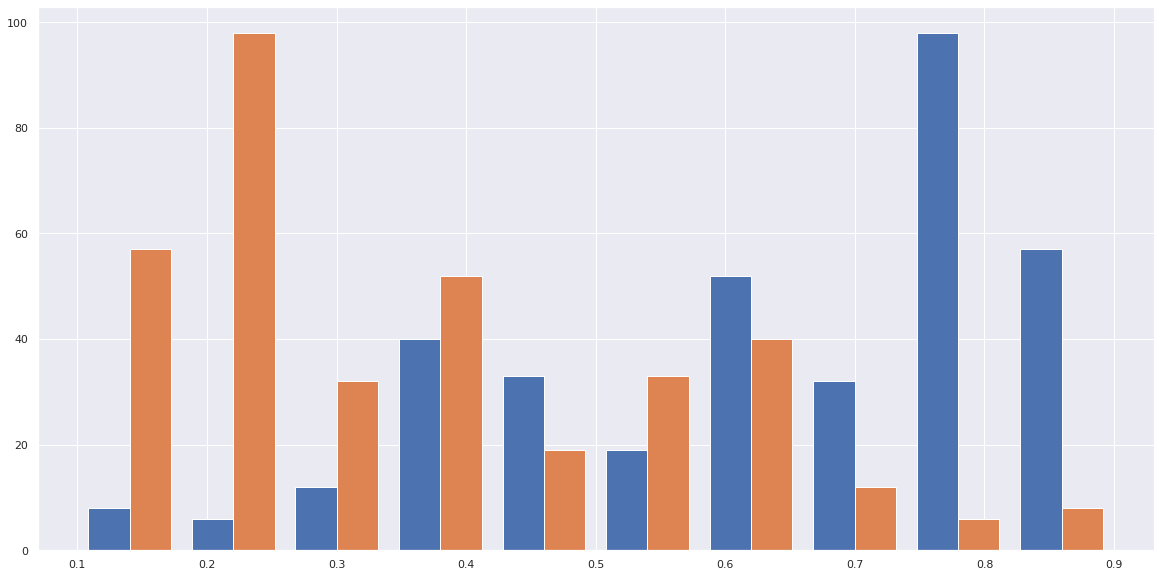

In [39]:
import matplotlib.pyplot as plt
plt.hist(y_pred_p)
plt.show()

In [40]:

matriz_confusion = metrics.confusion_matrix(y_test, y_pred)
matriz_confusion

array([[180,  27],
       [ 78,  72]])

In [43]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7058823529411765
Precision: 0.7272727272727273
Recall: 0.48


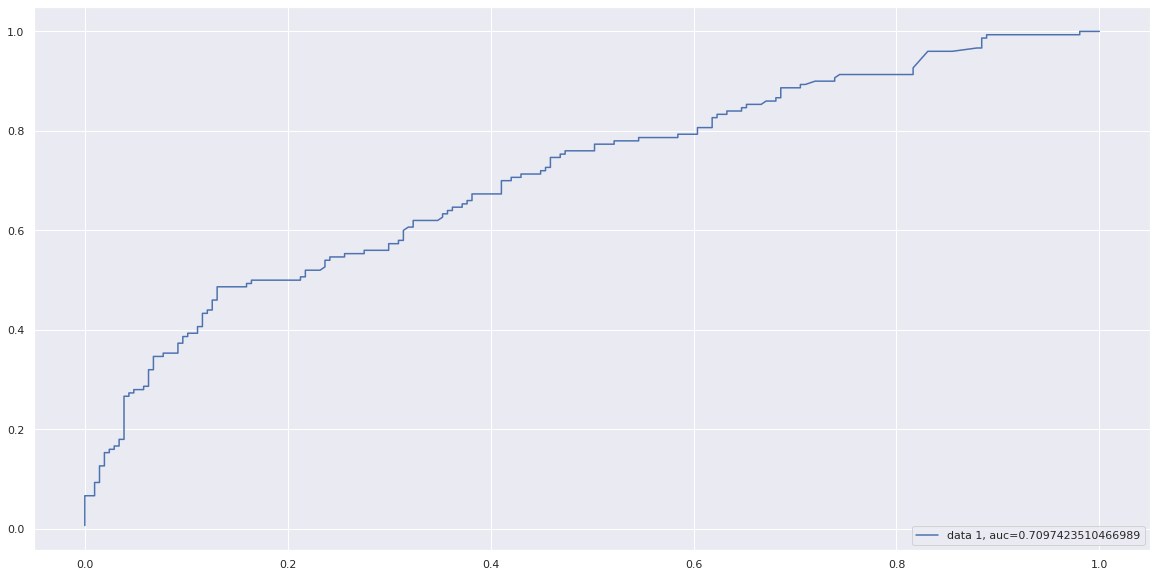

In [44]:
y_pred_proba = multi_log.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()